Q1. Implement logistic regression on the Iris dataset.

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



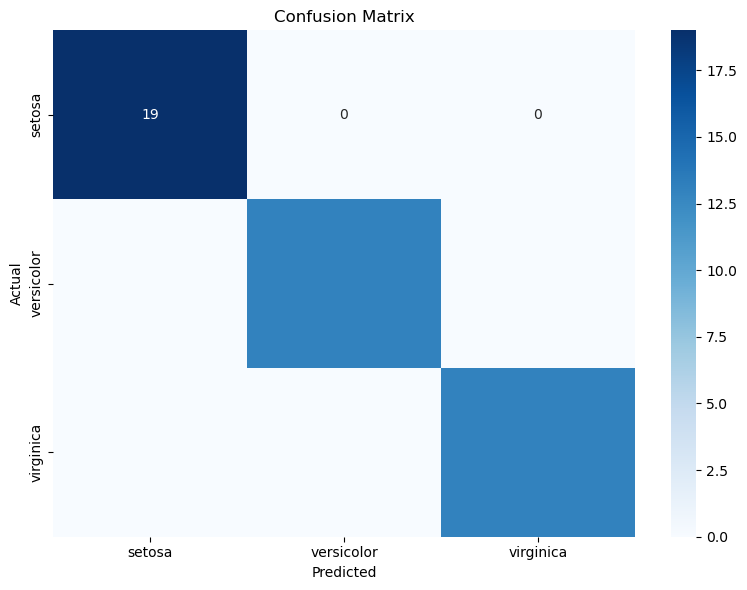

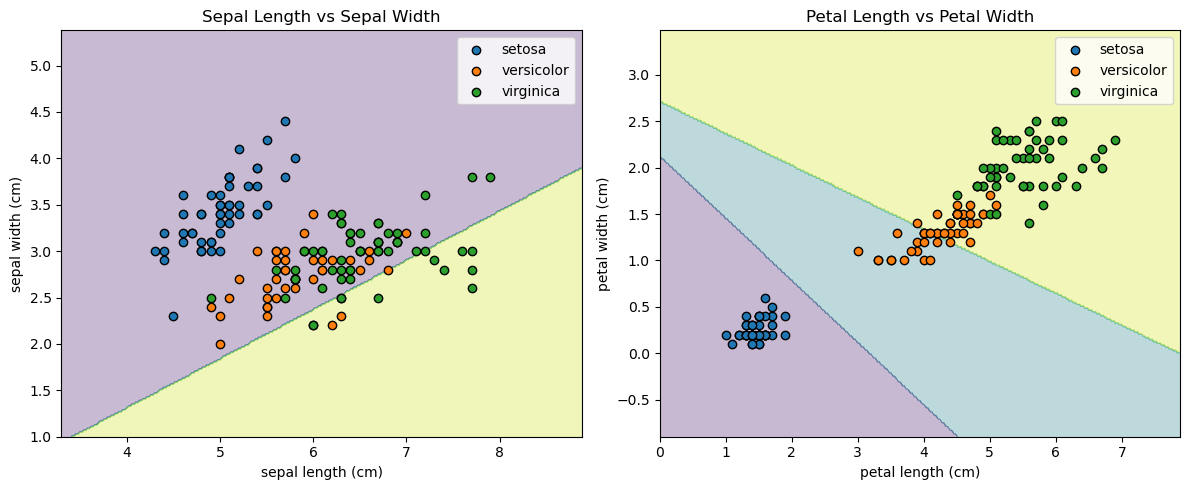


Model Coefficients:

Class: setosa
sepal length (cm): -0.9620
sepal width (cm): 1.0276
petal length (cm): -1.7426
petal width (cm): -1.5970

Class: versicolor
sepal length (cm): 0.4846
sepal width (cm): -0.3437
petal length (cm): -0.3007
petal width (cm): -0.6684

Class: virginica
sepal length (cm): 0.4774
sepal width (cm): -0.6838
petal length (cm): 2.0433
petal width (cm): 2.2654


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Visualize decision boundaries (for 2 features)
plt.figure(figsize=(12, 5))
feature_pairs = [(0, 1), (2, 3)]
titles = ['Sepal Length vs Sepal Width', 'Petal Length vs Petal Width']

for i, (f1, f2) in enumerate(feature_pairs):
    plt.subplot(1, 2, i+1)
    
    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, f1].min() - 1, X[:, f1].max() + 1
    y_min, y_max = X[:, f2].min() - 1, X[:, f2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Create features for prediction - initialize with zeros for all 4 features
    mesh_points = np.zeros((xx.ravel().shape[0], 4))
    # Fill in only the two features we're plotting
    mesh_points[:, f1] = xx.ravel()
    mesh_points[:, f2] = yy.ravel()
    
    # Transform the features
    Z_scaled = scaler.transform(mesh_points)
    
    # Predict and reshape
    Z = model.predict(Z_scaled)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # Plot training points
    for label in np.unique(y):
        plt.scatter(X[y == label, f1], X[y == label, f2], 
                   label=iris.target_names[label], edgecolors='k')
    
    plt.xlabel(iris.feature_names[f1])
    plt.ylabel(iris.feature_names[f2])
    plt.title(titles[i])
    plt.legend()

plt.tight_layout()
plt.show()

# Print model coefficients
print("\nModel Coefficients:")
for i, class_name in enumerate(iris.target_names):
    print(f"\nClass: {class_name}")
    for j, feature_name in enumerate(iris.feature_names):
        print(f"{feature_name}: {model.coef_[i, j]:.4f}")